In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

In [2]:
# The english.csv file contains a 2 columns namely the file name and label respectively and 
# 3411 rows of sample data app.

df = pd.read_csv("C:\Vishnu\semester Files\Machine learning\Alpha_numeric_hand_wriitten_reg\english.csv")
df


,image,label
0,Img/img001-001.png,0
1,Img/img001-002.png,0
2,Img/img001-003.png,0
3,Img/img001-004.png,0
4,Img/img001-005.png,0
...,...,...
3405,Img/img062-051.png,z
3406,Img/img062-052.png,z
3407,Img/img062-053.png,z
3408,Img/img062-054.png,z


In [3]:
# Getting the number of samples from each class(26+26+10)

img_data = df.to_numpy()


print("\n",np.shape(img_data),end="\n\n",sep="")

print(df.groupby('label').size())



(3410, 2)

label
0    55
1    55
2    55
3    55
4    55
     ..
v    55
w    55
x    55
y    55
z    55
Length: 62, dtype: int64


`Following code loads the resized gray scale images and flattens the N*N image to N^2 array with there corresponding labels`


In [4]:
def load_images_from_folder(img_data):
    
    list_file_names = img_data[:,0]
    labels = img_data[:,1]
    
    images = []
    absolute_path = "C:\\Vishnu\\semester Files\\Machine learning\\Alpha_numeric_hand_wriitten_reg\\"
    
    for file_name in list_file_names:
        # print(absolute_path + file_name)
        img = cv2.imread(absolute_path + file_name)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img,(64,64))
        img = img.flatten()
        if img is not None:
            images.append(img)
    return images,labels


In [5]:
images,labels = load_images_from_folder(img_data)

print(np.shape(images))
print(labels)

(3410, 4096)
['0' '0' '0' ... 'z' 'z' 'z']


In [26]:
import random
def show(images, titles, n, n_row = 3, n_col = 4):
    sample = random.sample(range(n), n_row*n_col)
    plt.figure(figsize =(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom = 0, left =.01, right =.99, top =.90, hspace =.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[sample[i]].reshape((64,64)), cmap = 'gray')
        plt.title(titles[sample[i]], size = 12)

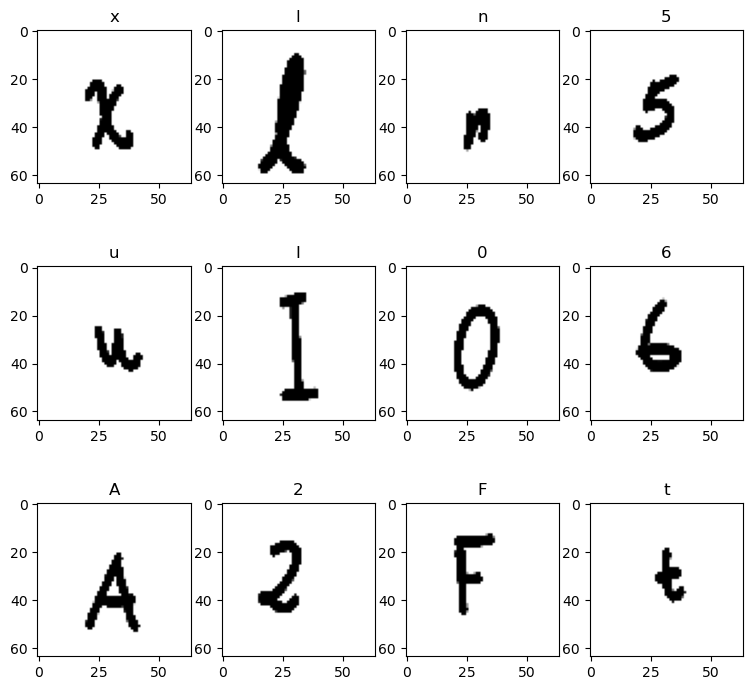

In [27]:
show(images,labels,len(images))

`Splitting 75% data into Train and 25% into Test data`

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.25, random_state = 42)

print(np.shape(x_train))
print(np.shape(x_test))
print(np.shape(y_train))
print(np.shape(y_test))


(2557, 4096)
(853, 4096)
(2557,)
(853,)


`Applying PCA to the Training data and getting the eigenfaces`

In [32]:
from sklearn.decomposition import PCA
n_components = 30

pca = PCA(n_components= n_components)
pca.fit(x_train)

eigenfaces = pca.components_#.reshape((n_components, 64, 64))
print("No of eigenfaces \n",np.shape(eigenfaces)[0],sep="",end="\n")
print("Eigenvectors:",np.shape(eigenfaces))

x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)


print("Train data:",np.shape(x_train_pca))
print("Test data:",np.shape(x_test_pca))

No of eigenfaces 
30
Eigenvectors: (30, 4096)
Train data: (2557, 30)
Test data: (853, 30)


`Using the Knn classifier to classify the test data for different K values`

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report


k_value = 1
for k_value in [1,3,5,7]:
    knn = KNeighborsClassifier(k_value)
    knn.fit(x_train_pca, y_train)

    result = knn.predict(x_test_pca)

    print("\nAccuracy for k_value",k_value,": {:0.2f}".format(knn.score(x_test_pca, y_test)))
    print("-------------------------------------------------------------\n\n")
    # if k_value  == 1:
        # print(metrics.confusion_matrix(y_test, result))
        # print(classification_report(y_test, result, target_names = np.unique(labels)))

c:\Users\Vishnuram\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Vishnuram\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set 


Accuracy for k_value 1 : 0.42
-------------------------------------------------------------



Accuracy for k_value 3 : 0.38
-------------------------------------------------------------




c:\Users\Vishnuram\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Vishnuram\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set 


Accuracy for k_value 5 : 0.37
-------------------------------------------------------------



Accuracy for k_value 7 : 0.36
-------------------------------------------------------------




c:\Users\Vishnuram\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


`Visualization of predicted data from Knn`

In [72]:
su = []
la = []
random.seed(21)
x = list(range(1,len(y_test)))
ch = random.sample(x, 12)
for i in range(12):
    x = list(range(1,len(y_test)))
    ch = random.choice(x)
    # print(ch)
    su.append(eigenfaces.T@x_test_pca[ch])
    la.append("Actual:"+y_test[ch]+" Predicted:"+result[ch])

print(np.shape(su))


(12, 4096)


`List of Test data with actual label vs predicted label`

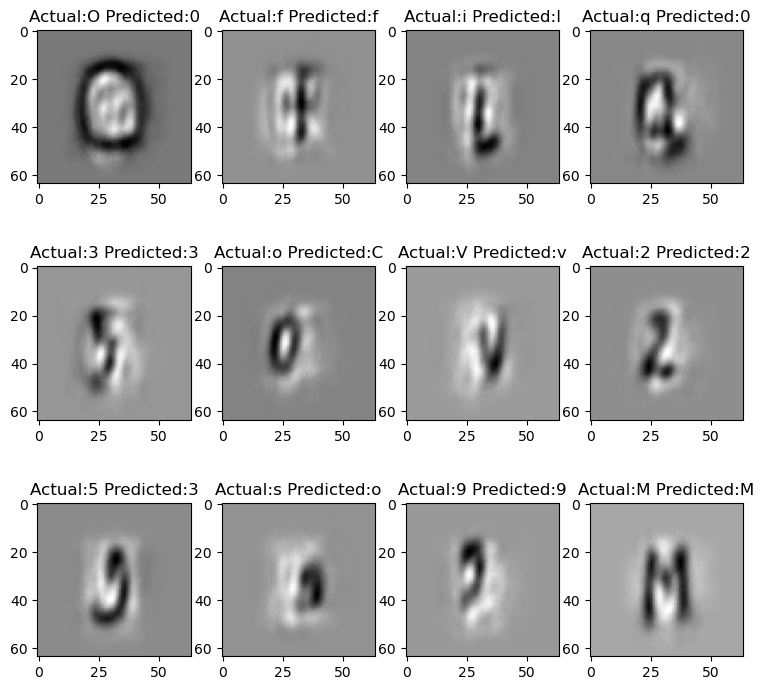

In [73]:
show(su,la,12)


`Using SVM classifier model to classify the test data`

In [75]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix

clf = SVC()
# fit model
clf = clf.fit(x_train_pca, y_train)
y_pred = clf.predict(x_test_pca)
print(classification_report(y_test, y_pred, target_names = np.unique(labels)))
print("Confusion Matrix is:")
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.54      0.39      0.45        18
           1       0.35      0.56      0.43        16
           2       0.54      0.58      0.56        12
           3       0.60      0.55      0.57        22
           4       0.22      0.29      0.25        17
           5       0.46      0.32      0.37        19
           6       0.55      0.55      0.55        11
           7       0.50      0.59      0.54        17
           8       0.55      0.38      0.44        16
           9       0.57      0.62      0.59        13
           A       0.72      0.65      0.68        20
           B       0.82      0.82      0.82        11
           C       0.53      0.62      0.57        13
           D       0.67      0.57      0.62        14
           E       0.67      0.62      0.65        16
           F       0.67      0.50      0.57        16
           G       0.67      0.83      0.74        12
           H       0.42    

In [74]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(max_iter=5000)
log_clf.fit(x_train_pca, y_train)
y_pred_log_reg = log_clf.predict(x_test_pca)
# print(y_pred_log_reg)

c:\Users\Vishnuram\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
print("Accuracy:",log_clf.score(x_test_pca,y_test))

Accuracy: 0.324736225087925


In [20]:
from sklearn import metrics
print(metrics.confusion_matrix(log_clf.predict(x_test_pca), y_test))

[[3 0 0 ... 0 0 0]
 [0 5 1 ... 0 0 0]
 [1 0 5 ... 0 0 0]
 ...
 [1 0 0 ... 5 0 1]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 1 0 0]]
